In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import mahotas as mt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
%matplotlib inline


path = "Leaves/leaf"
files = os.listdir(path)
print("done")

Using TensorFlow backend.


done


In [2]:
def find_vector(img, file):
        gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        blur = cv2.GaussianBlur(gray, (55,55),0)
        ret,otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        kernel = np.ones((50,50),np.uint8) 
        closing = cv2.morphologyEx(otsu, cv2.MORPH_CLOSE, kernel) #mask
        
        

        contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        cnt = contours[0]
        
        area = cv2.contourArea(cnt)
        perimeter = cv2.arcLength(cnt,True)

        species = find_species(file) #prima naziv photografije "file"
        #Shape features
        x,y,w,h = cv2.boundingRect(cnt)
        aspect_ratio = float(w)/h
        rectangularity = w*h/area
        circularity = ((perimeter)**2)/area


        #Color features
        red_channel = img[:,:,0]
        green_channel = img[:,:,1]
        blue_channel = img[:,:,2]
        blue_channel[blue_channel == 255] = 0
        green_channel[green_channel == 255] = 0
        red_channel[red_channel == 255] = 0

        red_mean = np.mean(red_channel)
        green_mean = np.mean(green_channel)
        blue_mean = np.mean(blue_channel)

        red_std = np.std(red_channel)
        green_std = np.std(green_channel)
        blue_std = np.std(blue_channel)

        #Texture features
        textures = mt.features.haralick(gray)
        ht_mean = textures.mean(axis=0)
        contrast = ht_mean[1]
        correlation = ht_mean[2]
        inverse_diff_moments = ht_mean[4]
        entropy = ht_mean[8]

        vector = [species,area,perimeter,w,h,aspect_ratio,rectangularity,circularity,\
                  red_mean,green_mean,blue_mean,red_std,green_std,blue_std,\
                  contrast,correlation,inverse_diff_moments,entropy
                  ]
        
        return vector
    
breakpoints = [1001,1059,1060,1122,1552,1616,1123,1194,
               1195,1267,1268,1323,1324,1385,1386,1437,
               1497,1551,1438,1496,2001,2050,2051,2113,
               2114,2165,2166,2230,2231,2290,2291,2346,
               2347,2423,2424,2485,2486,2546,2547,2612,
               2616,2675,3001,3055,3056,3110,3111,3175,
               3176,3229,3230,3281,3282,3334,3335,3389,
               3390,3446,3447,3510,3511,3563,3566,3621]

def find_species(file):
    target_num = int(file.split(".")[0])
    flag = 0
    i = 0 
    for i in range(0,len(breakpoints),2):
        if((target_num >= breakpoints[i]) and (target_num <= breakpoints[i+1])):
            flag = 1
            break
    if(flag==1):
        target = int((i/2))
        return target # vraca redni br vrste [0,1...,31]

    

In [3]:
def create_dataset():
    names = ['species','area','perimeter','physiological_length','physiological_width','aspect_ratio', \
             'rectangularity','circularity', \
             'mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b', \
             'contrast','correlation','inverse_difference_moments','entropy'
            ]
    df = pd.DataFrame([], columns=names)
    
    for file in files:
        pathPhoto = os.path.join(path,file)
        print(file)

        original_img = cv2.imread(pathPhoto) # ucitavanje slike sa diska
        original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB) # konvertovanje iz BGR u RGB model boja (OpenCV ucita sliku kao BGR)
        
        data = img_to_array(original_img)
        samples = np.expand_dims(data, 0)

        datagen = ImageDataGenerator(
                    rotation_range=45,
                    shear_range = 0.1,
                    zoom_range = [0.97, 1.6],
                    horizontal_flip = True
                    )
        it = datagen.flow(samples, batch_size=1)
        # generate samples and plot
        for i in range(9):
            # define subplot
            # generate batch of images
            batch = it.next()
            # convert to unsigned integers for viewing
            image = batch[0].astype('uint8')
            vector = find_vector(image, file)
            df_temp = pd.DataFrame([vector],columns=names)
            df = df.append(df_temp)

        vector = find_vector(original_img, file)
        df_temp = pd.DataFrame([vector],columns=names)
        df = df.append(df_temp)
    return df

dataset = create_dataset()
dataset.shape
dataset.to_csv("leaves_dataset_aug.csv")

1125.jpg
1126.jpg
1127.jpg
1128.jpg
1129.jpg
1130.jpg
1131.jpg
1132.jpg
1133.jpg
1134.jpg
1135.jpg
1136.jpg
1137.jpg
1138.jpg
1139.jpg
1140.jpg
1141.jpg
1142.jpg
1143.jpg
1144.jpg
1145.jpg
1146.jpg
1147.jpg
1148.jpg
1149.jpg
1150.jpg
1151.jpg
1152.jpg
1153.jpg
1154.jpg
1155.jpg
1156.jpg
1157.jpg
1158.jpg
1159.jpg
1160.jpg
1161.jpg
1162.jpg
1163.jpg
1164.jpg
1165.jpg
1166.jpg
1167.jpg
1168.jpg
1169.jpg
1170.jpg
1172.jpg
1173.jpg
1174.jpg
1175.jpg
1176.jpg
1177.jpg
1178.jpg
1179.jpg
1180.jpg
1181.jpg
1182.jpg
1183.jpg
1184.jpg
1185.jpg
1186.jpg
1187.jpg
1188.jpg
1189.jpg
1190.jpg
1191.jpg
1192.jpg
1193.jpg
1194.jpg
1269.jpg
1270.jpg
1271.jpg
1272.jpg
1273.jpg
1274.jpg
1275.jpg
1276.jpg
1277.jpg
1278.jpg
1279.jpg
1280.jpg
1282.jpg
1283.jpg
1284.jpg
1285.jpg
1286.jpg
1287.jpg
1288.jpg
1289.jpg
1290.jpg
1292.jpg
1293.jpg
1294.jpg
1295.jpg
1296.jpg
1297.jpg
1298.jpg
1299.jpg
1300.jpg
1301.jpg
1302.jpg
1303.jpg
1304.jpg
1305.jpg
1306.jpg
1307.jpg
1308.jpg
1309.jpg
1310.jpg
1311.jpg
1312.jpg
1

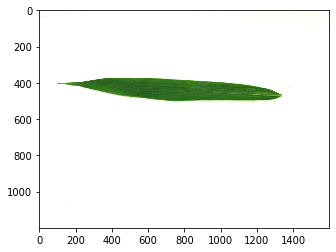

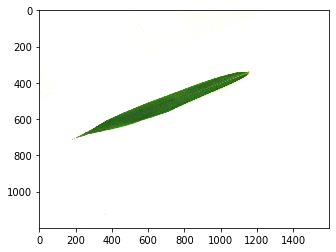

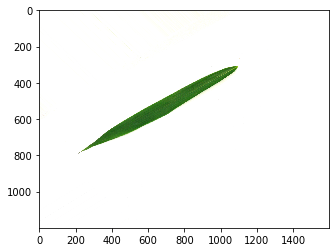

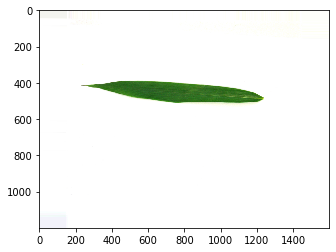

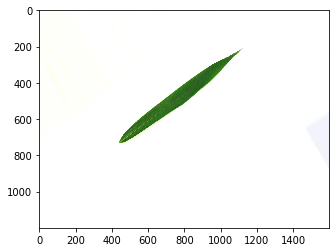

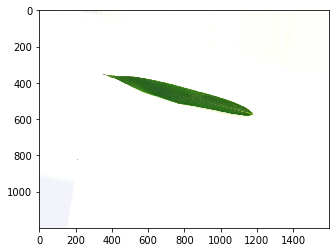

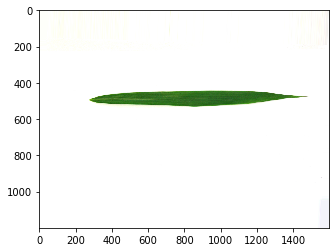

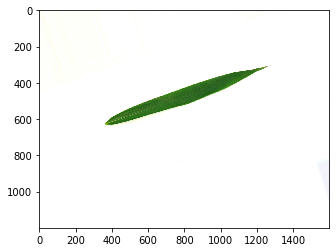

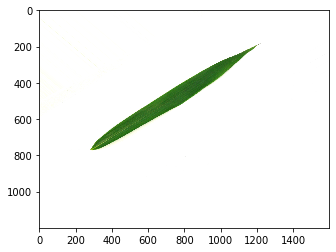

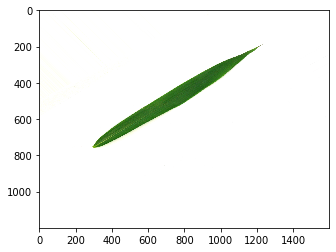

In [10]:
original_img = cv2.imread("Leaves/1002.jpg") # ucitavanje slike sa diska
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB) # konvertovanje iz BGR u RGB model boja (OpenCV ucita sliku kao BGR)
plt.imshow(original_img)
plt.show()
data = img_to_array(original_img)
samples = np.expand_dims(data, 0)

datagen = ImageDataGenerator(
            rotation_range=45,
            shear_range = 0.1,
            zoom_range = [0.97, 1.6],
            horizontal_flip = True
            )
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    plt.imshow(image)
    plt.show()
   